# Employee Retention

In [65]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
#load data
df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Exploratory Data Analysis

In [67]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
df.info

<bound method DataFrame.info of        satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2      

In [68]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [69]:
#Check null values
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

No null value

# Data Visualization

Text(0.5, 1.0, 'Impact of salary on retansion')

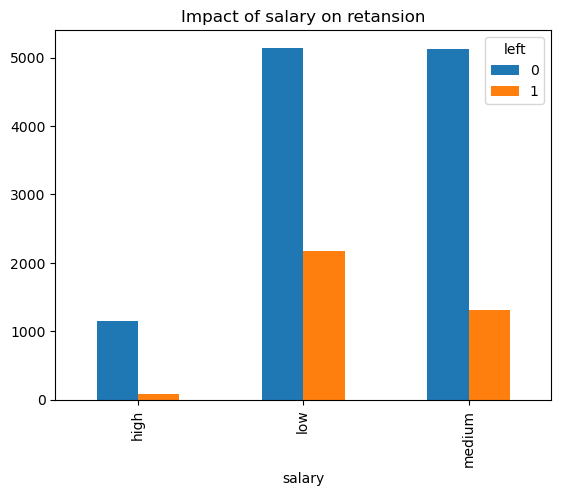

In [70]:
#Plot bar charts showing impact of employee salaries on retention
pd.crosstab(df.salary,df.left).plot(kind='bar')
plt.title("Impact of salary on retansion")

Text(0.5, 1.0, 'Corelation between department and employ retansion')

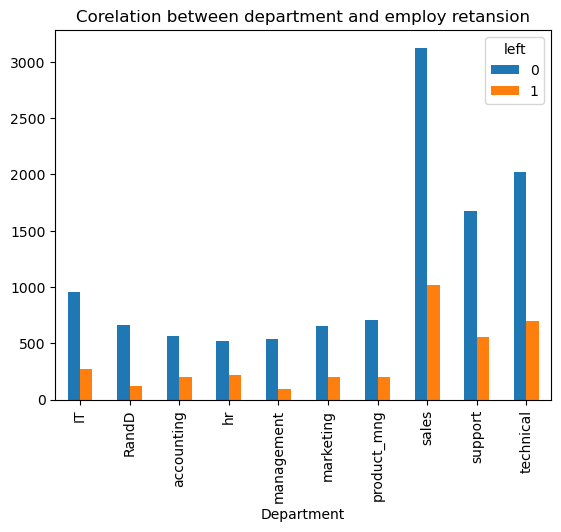

In [71]:
#Plot bar charts showing Corelation between department and employ retansion
pd.crosstab(df.Department,df.left).plot(kind='bar')
plt.title("Corelation between department and employ retansion")

Above chart showing almost every department has same rate of retention

# Using logistic regeression

From above analysis, considering following columns as indepenmdent veriables:
1. satisfaction_level
2. average_montly_hours
3. promotion_last_5years
4. salary

In [72]:
indVar = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
indVar.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


replace salary column from text into numeric

In [73]:
indVar.replace({'salary':{'low':0, 'medium':1, 'high':2}}, inplace= True)

C:\Users\AST\AppData\Local\Temp\ipykernel_6116\1523997224.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indVar.replace({'salary':{'low':0, 'medium':1, 'high':2}}, inplace= True)


In [74]:
indVar.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,0
1,0.80,262,0,1
2,0.11,272,0,1
3,0.72,223,0,0
4,0.37,159,0,0


In [75]:
x = indVar
x.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,0
1,0.80,262,0,1
2,0.11,272,0,1
3,0.72,223,0,0
4,0.37,159,0,0


In [76]:
y = df.left
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

Split data into test and train

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3)

In [80]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [81]:
model.fit(x_train, y_train)

LogisticRegression()

In [82]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

# Check Accuracy

In [83]:
model.score(x_test,y_test)

0.7757777777777778